<a href="https://colab.research.google.com/github/liliayata/liliayata/blob/main/Kmeans_PurchasesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import cluster 
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import warnings


#Load the dataset:


In [ ]:
cc = pd.read_csv("CC GENERAL.csv") 
cc

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


#Missing values

In [ ]:
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
cc['CREDIT_LIMIT'].fillna(cc['CREDIT_LIMIT'].mode()[0],inplace=True)

cc.drop(['CUST_ID','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE'],axis=1,inplace= True)
cc

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959


#Hierarchical clustering

In [ ]:
siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(cc)
        sil_score = metrics.silhouette_score(cc, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
cc_h = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [ ]:
cc_h.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
0,2,0.507068,ward,2
1,4,0.490179,ward,4
3,8,0.275413,ward,8
5,12,0.267037,ward,12
7,16,0.263992,ward,16
2,6,0.263566,ward,6
6,14,0.261475,ward,14
4,10,0.258680,ward,10
8,18,0.254102,ward,18


#Plot the clusters. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(cc)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


print each point’s corresponding cluster

In [ ]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


#Agglomerative cluster plot
Each colored group represents a cluster.
we can notice that the most important cluster is the one of the people who pay the lowest amount in advance

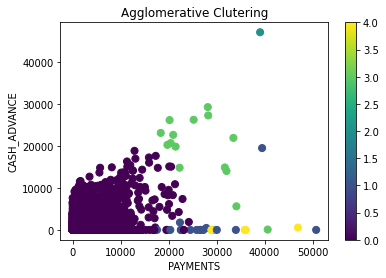

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (cc ['PAYMENTS'] , cc ["CASH_ADVANCE"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PAYMENTS")
ax.set_ylabel("CASH_ADVANCE")
plt.colorbar(scatter)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


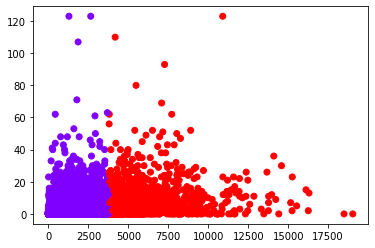

In [ ]:
from sklearn.cluster import AgglomerativeClustering
CC = cc.iloc[:,[0,10]].values

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster_labels=cluster.fit_predict(CC)  
print(cluster.labels_) 
print(cluster_labels) 

plt.scatter(CC[:,0],CC[:,1], c=cluster_labels, cmap='rainbow')

#Plot the dendrogram

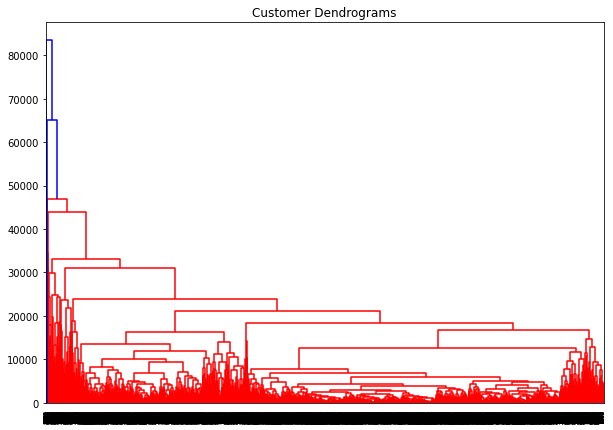

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(cc, method="complete"))

In [ ]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(cc)

KMeans(n_clusters=3, random_state=0)

In [ ]:
labels=pd.DataFrame(kmeans.labels_) #print the label of each point in our data after the clustering is done.
labels


,0
0,1
1,0
2,2
3,1
4,1
...,...
8945,2
8946,2
8947,2
8948,1


In [ ]:
sd=[]
k=range(1,20)
for K in k:
    km=KMeans(n_clusters=K)
    km=km.fit(cc)
    sd.append(km.inertia_)

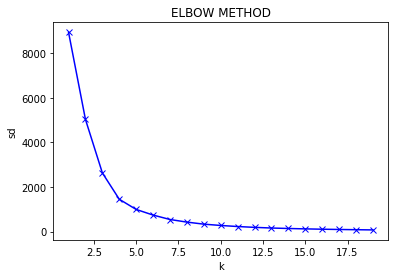

In [ ]:
plt.plot(k,sd,'bx-')
plt.xlabel('k')
plt.ylabel('sd')
plt.title('ELBOW METHOD')
plt.show()

normalizing the data

In [ ]:
scaler=StandardScaler()
cc=scaler.fit_transform(cc)
cc=normalize(cc)
cc=pd.DataFrame(cc)
pca=PCA(n_components=2)
cc=pca.fit_transform(cc)
cc=pd.DataFrame(cc)
cc

,0,1
0,-0.791251,-0.591070
1,-0.120460,1.002050
2,0.881854,0.495985
3,-0.905651,0.417427
4,-0.921566,-0.359060
...,...,...
8945,0.269398,-0.954856
8946,0.268873,-0.954998
8947,-0.031111,-0.988946
8948,-0.967766,-0.209763


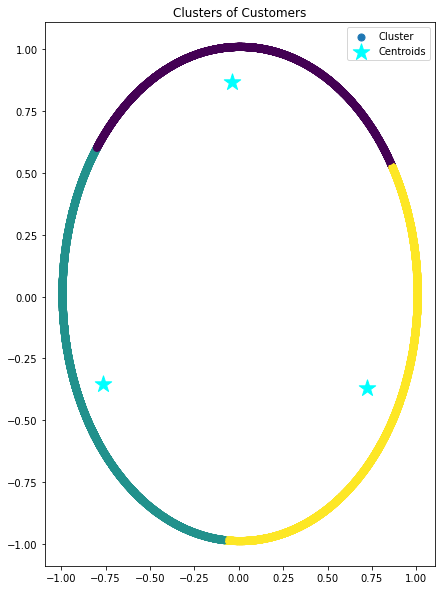

In [ ]:
plt.figure(figsize=(7,10))

plt.scatter(cc[0],cc[1],s=50,c=labels,label='Cluster')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='cyan', marker='*', label = 'Centroids')
plt.title('Clusters of Customers')
plt.legend()
plt.show()